***
In this notebook, we will move to generate pcrater maps that contain meteorological forcing information (daily precipitation and temperature) for a SPHY model input.
***

# 00. Load Packages

In [1]:
import os
import pcraster as pcr
import pcr_tool

import pandas as pd
import cartopy

# 01. Basic Setup for a Bhutan watershed (Punatsangchhu, Wangchhu, Amochhu, and Jaldakah)

In [2]:
epsg_model = 5266 # Bhutan National Grid: a transverse Mercator projection
epsg_lonlat = 4326 # the common lat-lon coordinate reference system

path_data = os.path.join('..', 'data')
path_output = os.path.join('..', 'input') # the "input" folder will be directly used as an input path for the SPHY model run
os.makedirs(path_output, exist_ok = True)

# plotting options
flag_plot_aguila = True
flag_plot_cartopy = True

# Bhutan Administrative Boundaries (Level 1) to be added in a plot
path_shape = os.path.join(path_data, 'SHAPE', 'btn_admbnda_adm1_bnlc_20201026.shp')
shape_geometry = cartopy.io.shapereader.Reader(path_shape).geometries()
shape_feature = cartopy.feature.ShapelyFeature(shape_geometry, crs = cartopy.crs.PlateCarree(), facecolor = 'none', linewidth = 0.25)

# 02. Load Clonemap and DEM

First, we need to declare the class that we will be using throughout this notebook, with an EPSG to define a clonemap.

In [3]:
print(f'- Input EPSG:\n{epsg_model}')
map_clone = pcr_tool.clonemap(epsg = epsg_model)

- Input EPSG:
5266


Let's load the clonemap and DEM that we generated in the previous notebook.

In [4]:
# load clonemap
path_clonemap = os.path.join(path_output, 'clone.map')
print(f'- Input PCRaster Path for Clonemap:\n{path_clonemap}')
map_clone.load_clonemap(path = path_clonemap)

# load DEM
path_dem = os.path.join(path_output, 'dem.map')
print(f'- Input PCRaster Path for DEM:\n{path_dem}')
map_dem = map_clone.read_pcraster(path = path_dem)
map_clone.set_dem(map_dem)

print('- Outputs:')
print(map_dem)

# plots
if flag_plot_aguila:
    pcr.aguila(map_clone.clonemap)
    pcr.aguila(map_dem)

- Input PCRaster Path for Clonemap:
../input/clone.map
- Input PCRaster Path for DEM:
../input/dem.map
- Outputs:


# 03. Generate Meteorological Forcing Inputs

We're going to generate meteorological forcing inputs for 2002-2004 from the GloH2O MSMX-Past datesets: daily precipitation, temperature average, temperature minimum, and temperature maximum, respectively.

**NOTE**: The meteorological forcing datasets should be processed in daily temporal resolution in advance. Here, the GloH2O MSMX-Past daily product is used as an example.

In [5]:
path_forcing = [
    os.path.join(path_data, 'FORCING', 'MSWX-Past_daily_subset_2002.nc'),
    os.path.join(path_data, 'FORCING', 'MSWX-Past_daily_subset_2003.nc'),
    os.path.join(path_data, 'FORCING', 'MSWX-Past_daily_subset_2004.nc'),
]
print(f'- Input Path for Meteorological Forcing:\n{path_forcing}')

start_date, end_date = '01/01/2002', '12/31/2004'
xdim, ydim, tdim = 'lon', 'lat', 'time' # variable names of x-dimension, y-dimension, and time-dimension in the netcdf files
var_prcp = 'precipitation' # variable name for precipitation
var_tavg = 'air_temperature' # variable name for temperature average in the netcdf files
var_tmin = 'air_temperature_min' # variable name for temperature minimum in the netcdf files
var_tmax = 'air_temperature_max' # variable name for temperature maximum in the netcdf files

idx_plot = 2
tcoord = pd.date_range(start = pd.Timestamp(start_date), end = pd.Timestamp(end_date), freq = 'D') # time index to read from the netcdf files

print('- Outputs:')
print(tcoord)

- Input Path for Meteorological Forcing:
['/Users/sony061/Library/CloudStorage/OneDrive-PNNL/PNNL/Shared/External/SAGE II/FORCING/MSWX-Past_daily_subset_2002.nc', '/Users/sony061/Library/CloudStorage/OneDrive-PNNL/PNNL/Shared/External/SAGE II/FORCING/MSWX-Past_daily_subset_2003.nc', '/Users/sony061/Library/CloudStorage/OneDrive-PNNL/PNNL/Shared/External/SAGE II/FORCING/MSWX-Past_daily_subset_2004.nc']
- Outputs:
DatetimeIndex(['2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04',
               '2002-01-05', '2002-01-06', '2002-01-07', '2002-01-08',
               '2002-01-09', '2002-01-10',
               ...
               '2004-12-22', '2004-12-23', '2004-12-24', '2004-12-25',
               '2004-12-26', '2004-12-27', '2004-12-28', '2004-12-29',
               '2004-12-30', '2004-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D')


- Outputs:
[<pcraster._pcraster.Field object at 0x166a92df0>, <pcraster._pcraster.Field object at 0x166b07530>, <pcraster._pcraster.Field object at 0x165ef2db0>, <pcraster._pcraster.Field object at 0x166e35870>, <pcraster._pcraster.Field object at 0x16610b0b0>, <pcraster._pcraster.Field object at 0x16610e330>, <pcraster._pcraster.Field object at 0x1660a5930>, <pcraster._pcraster.Field object at 0x166e36070>, <pcraster._pcraster.Field object at 0x1660ffef0>, <pcraster._pcraster.Field object at 0x166e062b0>, <pcraster._pcraster.Field object at 0x166e489b0>, <pcraster._pcraster.Field object at 0x166e1a830>, <pcraster._pcraster.Field object at 0x166e50030>, <pcraster._pcraster.Field object at 0x166e35eb0>, <pcraster._pcraster.Field object at 0x166e48c70>, <pcraster._pcraster.Field object at 0x166e509b0>, <pcraster._pcraster.Field object at 0x166e42970>, <pcraster._pcraster.Field object at 0x166e425b0>, <pcraster._pcraster.Field object at 0x166e42c30>, <pcraster._pcraster.Field object at 0x

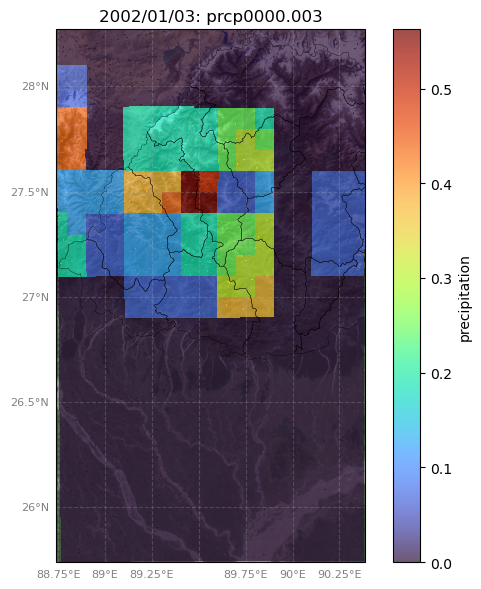

In [6]:
# daily precipitation
map_prcp = map_clone.read_netcdf(
    path = path_forcing, # netcdf path to read
    varname = var_prcp, # varable name to read
    epsg = epsg_lonlat, # input EPSG
    datatype = pcr.Scalar, # pcraster data type
    xdim = xdim, # variable name of x-dimension
    ydim = ydim, # variable name of y-dimension
    tdim = tdim, # variable name of time-dimension
    tcoord = tcoord, # time index to read
    )

print('- Outputs:')
print(map_prcp)

path_output_prcp = os.path.join(path_output, 'prcp') # create a separate folder to store precipitation data
os.makedirs(path_output_prcp, exist_ok = True)
path_prcp = [os.path.join(path_output_prcp, 'prcp{:08.3f}'.format((1 + n) / 1000)) for n in range(len(tcoord))]
# export into a pcraster file
map_clone.write_pcraster(
    path = path_prcp, # path to write in the pcraster format
    field = map_prcp, # pcraster.Field to write
    )

# plots
if flag_plot_aguila: pcr.aguila(map_prcp[idx_plot])
if flag_plot_cartopy:
    map_clone.plot_cartopy(
        field = map_prcp[idx_plot], # pcraster.Field to plot
        shapes = [shape_feature], # index to plot if field is a list
        figsize = (6, 6), # matplotlib figure size
        basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
        basemap_level = 10, # cartopy basemap zoom level
        extent = None, # cartopy map extent
        vmin = None, # matplotlib contour min
        vmax = None, # matplotlib contour max
        cmap = 'turbo', # matplotlib contour colormap
        alpha = 0.7, # matplotlib contour transparency
        title = tcoord[idx_plot].strftime('%Y/%m/%d') + ': ' + os.path.basename(path_prcp[idx_plot]), # matplotlib figure title
        clabel = 'precipitation', # matplotlib contour label
        savefig = None, # path to save the figure
        )

- Outputs:
[<pcraster._pcraster.Field object at 0x167bcdfb0>, <pcraster._pcraster.Field object at 0x167ac38b0>, <pcraster._pcraster.Field object at 0x16a451170>, <pcraster._pcraster.Field object at 0x166e98af0>, <pcraster._pcraster.Field object at 0x16a451470>, <pcraster._pcraster.Field object at 0x166143ab0>, <pcraster._pcraster.Field object at 0x167c096f0>, <pcraster._pcraster.Field object at 0x167c68d70>, <pcraster._pcraster.Field object at 0x166eb0af0>, <pcraster._pcraster.Field object at 0x16a474a70>, <pcraster._pcraster.Field object at 0x1661480f0>, <pcraster._pcraster.Field object at 0x167c41170>, <pcraster._pcraster.Field object at 0x167be9f70>, <pcraster._pcraster.Field object at 0x16a474970>, <pcraster._pcraster.Field object at 0x167c1c3f0>, <pcraster._pcraster.Field object at 0x167c4e430>, <pcraster._pcraster.Field object at 0x16a451270>, <pcraster._pcraster.Field object at 0x167bc9d70>, <pcraster._pcraster.Field object at 0x167b096f0>, <pcraster._pcraster.Field object at 0x

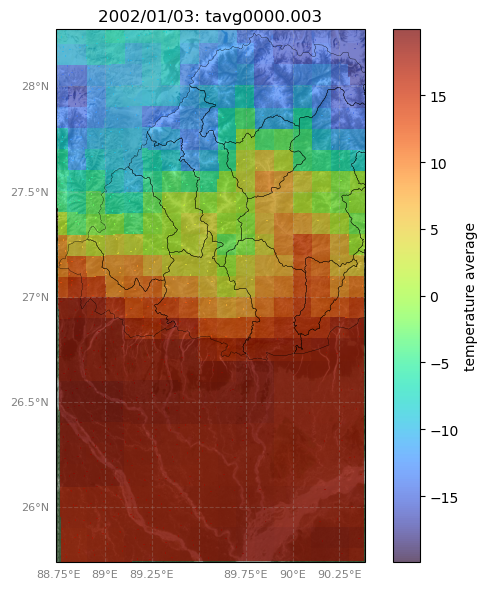

In [7]:
# daily temperature average
map_tavg = map_clone.read_netcdf(
    path = path_forcing, # netcdf path to read
    varname = var_tavg, # varable name to read
    epsg = epsg_lonlat, # input EPSG
    datatype = pcr.Scalar, # pcraster data type
    xdim = xdim, # variable name of x-dimension
    ydim = ydim, # variable name of y-dimension
    tdim = tdim, # variable name of time-dimension
    tcoord = tcoord, # time index to read
    )

print('- Outputs:')
print(map_tavg)

path_output_tavg = os.path.join(path_output, 'tavg') # create a separate folder to store daily temperature average data
os.makedirs(path_output_tavg, exist_ok = True)
path_tavg = [os.path.join(path_output_tavg, 'tavg{:08.3f}'.format((1 + n) / 1000)) for n in range(len(tcoord))]
# export into a pcraster file
map_clone.write_pcraster(
    path = path_tavg, # path to write in the pcraster format
    field = map_tavg, # pcraster.Field to write
    )

# plots
if flag_plot_aguila: pcr.aguila(path_tavg[idx_plot])
if flag_plot_cartopy: map_clone.plot_cartopy(
    field = path_tavg[idx_plot], # pcraster.Field to plot
    shapes = [shape_feature], # index to plot if field is a list
    figsize = (6, 6), # matplotlib figure size
    basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
    basemap_level = 10, # cartopy basemap zoom level
    extent = None, # cartopy map extent
    vmin = None, # matplotlib contour min
    vmax = None, # matplotlib contour max
    cmap = 'turbo', # matplotlib contour colormap
    alpha = 0.7, # matplotlib contour transparency
    title = tcoord[idx_plot].strftime('%Y/%m/%d') + ': ' + os.path.basename(path_tavg[idx_plot]), # matplotlib figure title
    clabel = 'temperature average', # matplotlib contour label
    savefig = None, # path to save the figure
    )

- Outputs:
[<pcraster._pcraster.Field object at 0x167c501f0>, <pcraster._pcraster.Field object at 0x166155df0>, <pcraster._pcraster.Field object at 0x168f31770>, <pcraster._pcraster.Field object at 0x16a4113b0>, <pcraster._pcraster.Field object at 0x167c68e30>, <pcraster._pcraster.Field object at 0x16a454570>, <pcraster._pcraster.Field object at 0x167c50970>, <pcraster._pcraster.Field object at 0x167a85df0>, <pcraster._pcraster.Field object at 0x167c68d30>, <pcraster._pcraster.Field object at 0x107665830>, <pcraster._pcraster.Field object at 0x1075e0430>, <pcraster._pcraster.Field object at 0x167bf46b0>, <pcraster._pcraster.Field object at 0x168f31130>, <pcraster._pcraster.Field object at 0x168f0cbf0>, <pcraster._pcraster.Field object at 0x168f31230>, <pcraster._pcraster.Field object at 0x168f13570>, <pcraster._pcraster.Field object at 0x168f1f6f0>, <pcraster._pcraster.Field object at 0x16a445bb0>, <pcraster._pcraster.Field object at 0x168f13bb0>, <pcraster._pcraster.Field object at 0x

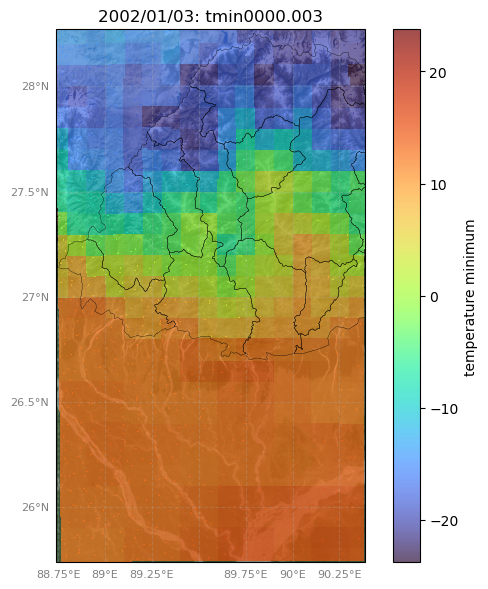

In [8]:
# daily temperature minimum
map_tmin = map_clone.read_netcdf(
    path = path_forcing, # netcdf path to read
    varname = var_tmin, # varable name to read
    epsg = epsg_lonlat, # input EPSG
    datatype = pcr.Scalar, # pcraster data type
    xdim = xdim, # variable name of x-dimension
    ydim = ydim, # variable name of y-dimension
    tdim = tdim, # variable name of time-dimension
    tcoord = tcoord, # time index to read
    )

print('- Outputs:')
print(map_tmin)

path_output_tmin = os.path.join(path_output, 'tmin') # create a separate folder to store daily temperature minimum data
os.makedirs(path_output_tmin, exist_ok = True)
path_tmin = [os.path.join(path_output_tmin, 'tmin{:08.3f}'.format((1 + n) / 1000)) for n in range(len(tcoord))]
# export into a pcraster file
map_clone.write_pcraster(
    path = path_tmin, # path to write in the pcraster format
    field = map_tmin, # pcraster.Field to write
    )

# plots
if flag_plot_aguila: pcr.aguila(path_tmin[idx_plot])
if flag_plot_cartopy:
    map_clone.plot_cartopy(
        field = path_tmin[idx_plot], # pcraster.Field to plot
        shapes = [shape_feature], # index to plot if field is a list
        figsize = (6, 6), # matplotlib figure size
        basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
        basemap_level = 10, # cartopy basemap zoom level
        extent = None, # cartopy map extent
        vmin = None, # matplotlib contour min
        vmax = None, # matplotlib contour max
        cmap = 'turbo', # matplotlib contour colormap
        alpha = 0.7, # matplotlib contour transparency
        title = tcoord[idx_plot].strftime('%Y/%m/%d') + ': ' + os.path.basename(path_tmin[idx_plot]), # matplotlib figure title
        clabel = 'temperature minimum', # matplotlib contour label
        savefig = None, # path to save the figure
        )

- Outputs:
[<pcraster._pcraster.Field object at 0x168fbb730>, <pcraster._pcraster.Field object at 0x1661cf770>, <pcraster._pcraster.Field object at 0x1660f49b0>, <pcraster._pcraster.Field object at 0x16a4836f0>, <pcraster._pcraster.Field object at 0x16a474c70>, <pcraster._pcraster.Field object at 0x16a4832f0>, <pcraster._pcraster.Field object at 0x135d98cb0>, <pcraster._pcraster.Field object at 0x168f08c30>, <pcraster._pcraster.Field object at 0x168f265b0>, <pcraster._pcraster.Field object at 0x16a483bb0>, <pcraster._pcraster.Field object at 0x16a4895f0>, <pcraster._pcraster.Field object at 0x10765d6b0>, <pcraster._pcraster.Field object at 0x16a489ef0>, <pcraster._pcraster.Field object at 0x16a4901b0>, <pcraster._pcraster.Field object at 0x168f26bb0>, <pcraster._pcraster.Field object at 0x16a489bb0>, <pcraster._pcraster.Field object at 0x168f261f0>, <pcraster._pcraster.Field object at 0x16a489e70>, <pcraster._pcraster.Field object at 0x16a4897f0>, <pcraster._pcraster.Field object at 0x

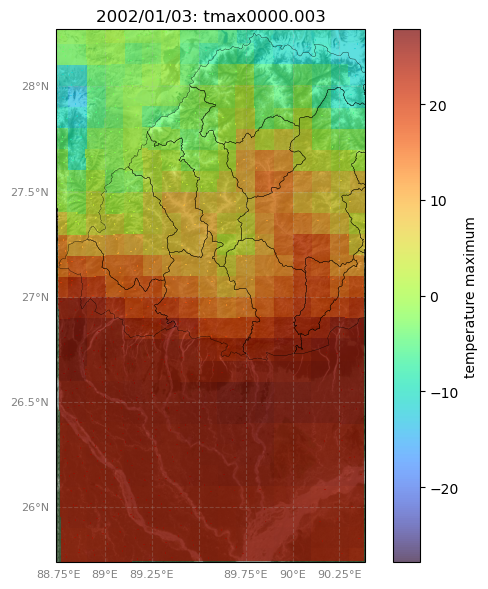

In [9]:
# daily temperature maximum
map_tmax = map_clone.read_netcdf(
    path = path_forcing, # netcdf path to read
    varname = var_tmax, # varable name to read
    epsg = epsg_lonlat, # input EPSG
    datatype = pcr.Scalar, # pcraster data type
    xdim = xdim, # variable name of x-dimension
    ydim = ydim, # variable name of y-dimension
    tdim = tdim, # variable name of time-dimension
    tcoord = tcoord, # time index to read
    )

print('- Outputs:')
print(map_tmax)

path_output_tmax = os.path.join(path_output, 'tmax') # create a separate folder to store daily temperature maximum data
os.makedirs(path_output_tmax, exist_ok = True)
path_tmax = [os.path.join(path_output_tmax, 'tmax{:08.3f}'.format((1 + n) / 1000)) for n in range(len(tcoord))]
# export into a pcraster file
map_clone.write_pcraster(
    path = path_tmax, # path to write in the pcraster format
    field = map_tmax, # pcraster.Field to write
    )

# plots
if flag_plot_aguila: pcr.aguila(path_tmax[idx_plot])
if flag_plot_cartopy: map_clone.plot_cartopy(
    field = path_tmax[idx_plot], # pcraster.Field to plot
    shapes = [shape_feature], # index to plot if field is a list
    figsize = (6, 6), # matplotlib figure size
    basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
    basemap_level = 10, # cartopy basemap zoom level
    extent = None, # cartopy map extent
    vmin = None, # matplotlib contour min
    vmax = None, # matplotlib contour max
    cmap = 'turbo', # matplotlib contour colormap
    alpha = 0.7, # matplotlib contour transparency
    title = tcoord[idx_plot].strftime('%Y/%m/%d') + ': ' + os.path.basename(path_tmax[idx_plot]), # matplotlib figure title
    clabel = 'temperature maximum', # matplotlib contour label
    savefig = None, # path to save the figure
    )